In [4]:
pip install ibge

SyntaxError: invalid syntax (<ipython-input-4-f976fbcba3b2>, line 1)

In [5]:
pip install folium

     |████████████████████████████████| 95 kB 2.9 MB/s eta 0:00:011
You should consider upgrading via the '/Users/andreza/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

from ibge.localidades import Municipios
dados_municipios = Municipios()
x = dados_municipios.json()
df = pd.DataFrame(x)
print (df)

           id                   nome  \
0     1100015  Alta Floresta D'Oeste   
1     1100023              Ariquemes   
2     1100031                 Cabixi   
3     1100049                 Cacoal   
4     1100056             Cerejeiras   
...       ...                    ...   
5565  5222005             Vianópolis   
5566  5222054         Vicentinópolis   
5567  5222203               Vila Boa   
5568  5222302          Vila Propício   
5569  5300108               Brasília   

                                           microrregiao  \
0     {'id': 11006, 'nome': 'Cacoal', 'mesorregiao':...   
1     {'id': 11003, 'nome': 'Ariquemes', 'mesorregia...   
2     {'id': 11008, 'nome': 'Colorado do Oeste', 'me...   
3     {'id': 11006, 'nome': 'Cacoal', 'mesorregiao':...   
4     {'id': 11008, 'nome': 'Colorado do Oeste', 'me...   
...                                                 ...   
5565  {'id': 52016, 'nome': 'Pires do Rio', 'mesorre...   
5566  {'id': 52015, 'nome': 'Meia Ponte', 'meso

In [11]:
df.id

0       1100015
1       1100023
2       1100031
3       1100049
4       1100056
         ...   
5565    5222005
5566    5222054
5567    5222203
5568    5222302
5569    5300108
Name: id, Length: 5570, dtype: object

In [12]:
ids = []
for i in df.id:
    ids.append(i)
ids

['1100015',
 '1100023',
 '1100031',
 '1100049',
 '1100056',
 '1100064',
 '1100072',
 '1100080',
 '1100098',
 '1100106',
 '1100114',
 '1100122',
 '1100130',
 '1100148',
 '1100155',
 '1100189',
 '1100205',
 '1100254',
 '1100262',
 '1100288',
 '1100296',
 '1100304',
 '1100320',
 '1100338',
 '1100346',
 '1100379',
 '1100403',
 '1100452',
 '1100502',
 '1100601',
 '1100700',
 '1100809',
 '1100908',
 '1100924',
 '1100940',
 '1101005',
 '1101104',
 '1101203',
 '1101302',
 '1101401',
 '1101435',
 '1101450',
 '1101468',
 '1101476',
 '1101484',
 '1101492',
 '1101500',
 '1101559',
 '1101609',
 '1101708',
 '1101757',
 '1101807',
 '1200013',
 '1200054',
 '1200104',
 '1200138',
 '1200179',
 '1200203',
 '1200252',
 '1200302',
 '1200328',
 '1200336',
 '1200344',
 '1200351',
 '1200385',
 '1200393',
 '1200401',
 '1200427',
 '1200435',
 '1200450',
 '1200500',
 '1200609',
 '1200708',
 '1200807',
 '1300029',
 '1300060',
 '1300086',
 '1300102',
 '1300144',
 '1300201',
 '1300300',
 '1300409',
 '1300508',
 '13

In [13]:
#importando as bibliotecas
import folium
import json
import requests


In [14]:
#Criando mapa bahia
mapa = folium.Map(location = [-13.4008012,-46.4565518],
 zoom_start=6)
estado = 'BA'
url = "https://servicodados.ibge.gov.br/api/v3/malhas/estados/{}?formato=application/vnd.geo+json".format(estado)
geo_json_data = requests.get(url).json()
style =  {'fillColor': 'blue', #cor de preenchimento
              'color': 'red',#cor da linha de contorno
             'weight': 0.0, #espessura da linha
               }
#Opção1
folium.GeoJson(geo_json_data, style_function=lambda x:style).add_to(mapa)
mapa

In [15]:
#Criando mapa de salvador
mapa = folium.Map(location = [-13.4008012,-46.4565518],
 zoom_start=6)
muni = 2927408 #salvador
url = "https://servicodados.ibge.gov.br/api/v3/malhas/municipios/{}?formato=application/vnd.geo+json".format(muni)
geo_json_data = requests.get(url).json()
style =  {'fillColor': 'blue', #cor de preenchimento
              'color': 'red',#cor da linha de contorno
             'weight': 0.0, #espessura da linha
               }
#Opção1
folium.GeoJson(geo_json_data, style_function=lambda x:style).add_to(mapa)
mapa

In [23]:
#buscando as malhas dos municípios
# não é trivial para todos os municipios. da timeout. 
#util apenas para municipios aleatorios.
for muni in (ids):
    muni = muni
    url = "https://servicodados.ibge.gov.br/api/v3/malhas/municipios/{}?formato=application/vnd.geo+json".format(muni)
    geo_json_data [muni] = requests.get(url).json()
    

#Criando mapa municipios
mapa = folium.Map(location = [-13.4008012,-46.4565518], zoom_start=6)    

style =  {'fillColor': 'blue', #cor de preenchimento
              'color': 'red',#cor da linha de contorno
             'weight': 0.0, #espessura da linha
               }
#adicionando as camadas ao mapa
folium.GeoJson(geo_json_data, style_function=lambda x:style).add_to(mapa)
    
mapa

ConnectionError: HTTPSConnectionPool(host='servicodados.ibge.gov.br', port=443): Max retries exceeded with url: /api/v3/malhas/municipios/2405801?formato=application/vnd.geo+json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f83899b0588>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [27]:
pip install pyshp

     |████████████████████████████████| 44 kB 845 kB/s eta 0:00:01
You should consider upgrading via the '/Users/andreza/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
# importando bibliotecas para usar shapefile de municipios direto no python
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#inicializando a visulalização
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [33]:
shp_path = "./dados/BR_Municipios_2021/BR_Municipios_2021.shp"
sf = shp.Reader(shp_path)

In [34]:
len(sf.shapes())

5572

In [35]:
sf.records()[1]

Record #1: ['1100023', 'Ariquemes', 'RO', 4426.571]

In [40]:
sf.records()[1][1]

'Ariquemes'

In [41]:
#função para converter shapefile em panda dataframe
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [42]:
#convertendo o aquivo em df
df = read_shapefile(sf)
df.shape

(5572, 5)

In [43]:
df.sample(5)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,coords
3565,3526407,Laranjal Paulista,SP,384.274,"[(-47.86136027399996, -22.863852305999956), (-..."
3116,3201605,Conceição da Barra,ES,1182.587,"[(-39.91113754399997, -18.179440202999917), (-..."
1684,2703205,Igreja Nova,AL,426.538,"[(-36.64023459299994, -10.035075986000006), (-..."
5351,5202502,Aruanã,GO,3054.773,"[(-50.849084982999955, -14.12124033899996), (-..."
5332,5200308,Alexânia,GO,846.876,"[(-48.54406282899994, -15.91336704299998), (-4..."


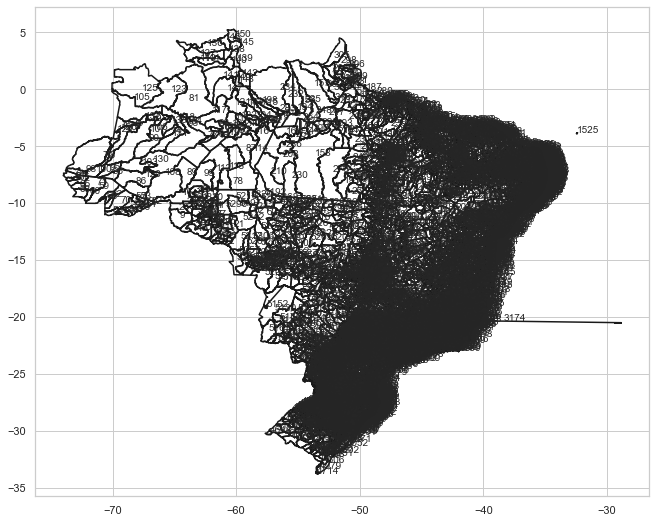

In [47]:
#plotando o mapa completo
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map(sf)

In [50]:
#para plotar um municipio especifico(bordas)
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

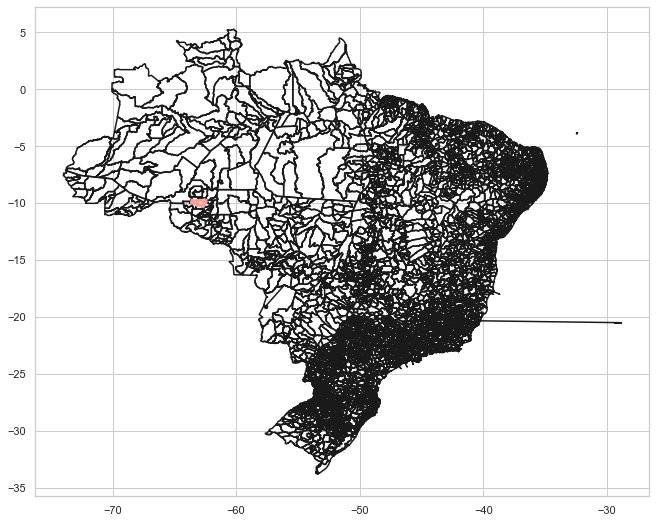

In [54]:
y_lim = None # latitude 
x_lim = None # longitude
plot_map2(1, sf, x_lim, y_lim)

In [55]:
#plotar um municipio especifico (preenchido)
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

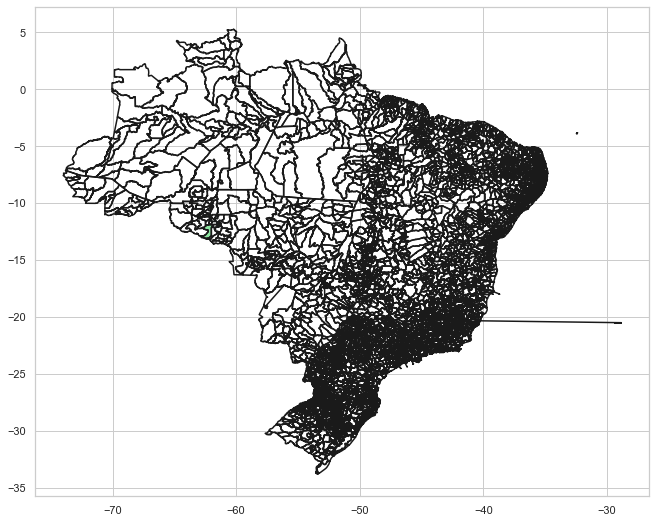

In [56]:
plot_map_fill(0, sf, x_lim, y_lim, color='g')


In [57]:
#plotar varios ids
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

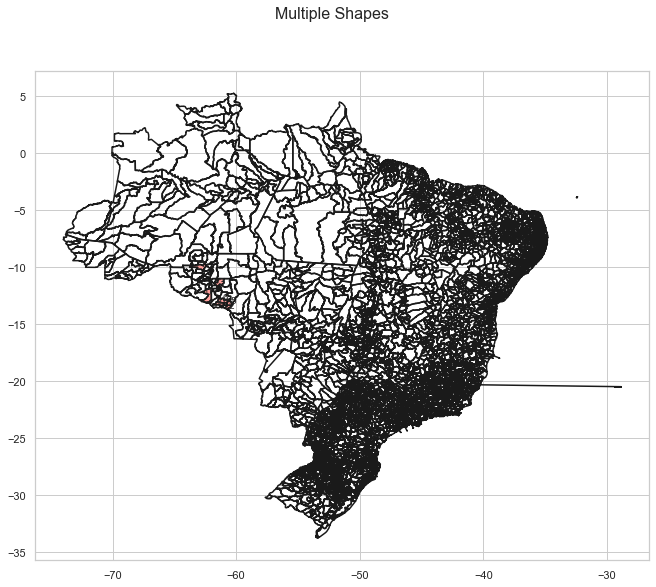

In [58]:
municipio_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            municipio_id, sf, color = 'r')